In [101]:
# Import necessary libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score


In [86]:
# Load your data
df = pd.read_csv(r"C:\Users\marlo\OneDrive\Desktop\adult (1)\adult.datasetv4.csv")
df.head()

,Education_level,Marriage_status,Race,Income
0,Bachelors,Never-married,White,<=50K
1,Bachelors,Married-civ-spouse,White,<=50K
2,HS-grad,Divorced,White,<=50K
3,11th,Married-civ-spouse,Black,<=50K
4,Bachelors,Married-civ-spouse,Black,<=50K


In [88]:
# Define education level mapping to simplify categories
education_mapping = {
    "preschool": "primary education",
    "1st-4th": "primary education",
    "5th-6th": "primary education",
    "7th-8th": "secondary education",
    "9th": "secondary education",
    "10th": "secondary education",
    "11th": "secondary education",
    "12th": "secondary education",
    "hs-grad": "secondary education",
    "some-college": "some college",
    "assoc-acdm": "some college",
    "assoc-voc": "some college",
    "bachelors": "undergraduate degree",
    "masters": "postgraduate degree",
    "doctorate": "postgraduate degree",
    "prof-school": "postgraduate degree"
}


# Apply education level mapping and create a binary married column
df["Education_level"] = df["Education_level"].str.strip().str.lower()
df["Simplified_Education_level"] = df["Education_level"].map(education_mapping)

# Step 1: Standardize text by stripping whitespace and converting to lowercase
df["Marriage_status"] = df["Marriage_status"].str.strip().str.lower()
df["Income"] = df["Income"].str.strip().str.lower()
df["Race"] = df["Race"].str.strip().str.lower()

# Step 2: Define the married statuses, ensuring they match the standardized text
married_statuses = ["married-civ-spouse", "married-spouse-absent", "married-af-spouse"]

# Step 3: Apply the lambda function to classify 'Married' status and "Income" status
df["Married"] = df["Marriage_status"].apply(lambda x: 1 if x in married_statuses else 0)
df["Over_50k"] = df["Income"].apply(lambda x: 1 if x in ">50k" else 0)


### Converted "Married" and "Over_50k" to numerical format

In [91]:
df.head()

,Education_level,Marriage_status,Race,Income,Simplified_Education_level,Married,Over_50k
0,bachelors,never-married,white,<=50k,undergraduate degree,0,0
1,bachelors,married-civ-spouse,white,<=50k,undergraduate degree,1,0
2,hs-grad,divorced,white,<=50k,secondary education,0,0
3,11th,married-civ-spouse,black,<=50k,secondary education,1,0
4,bachelors,married-civ-spouse,black,<=50k,undergraduate degree,1,0


In [93]:
# Label encode education level and one-hot encode race for use in the decision tree
le_education = LabelEncoder()

df["Education_Pedigree"] = le_education.fit_transform(df["Simplified_Education_level"])
df = df.drop(columns=["Simplified_Education_level","Education_level", "Marriage_status","Income"])

df.head()

,Race,Married,Over_50k,Education_Pedigree
0,white,0,0,4
1,white,1,0,4
2,white,0,0,2
3,black,1,0,2
4,black,1,0,4


In [95]:
df = pd.get_dummies(df, columns=["Race"], prefix="Race", dtype=int)
#df = pd.concat([df, Lineage], axis=1)
df.head()

,Married,Over_50k,Education_Pedigree,Race_amer-indian-eskimo,Race_asian-pac-islander,Race_black,Race_other,Race_white
0,0,0,4,0,0,0,0,1
1,1,0,4,0,0,0,0,1
2,0,0,2,0,0,0,0,1
3,1,0,2,0,0,1,0,0
4,1,0,4,0,0,1,0,0


In [ ]:
# Define features and target
#X = df[["Race", "Education_encoded", "Over_50k"]]


X=df[['Education_Pedigree',	'Over_50k',	'Race_amer-indian-eskimo',	'Race_asian-pac-islander',	'Race_black',	'Race_other',	'Race_white']]
y = df["Married"]

In [103]:
#Train Model
# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


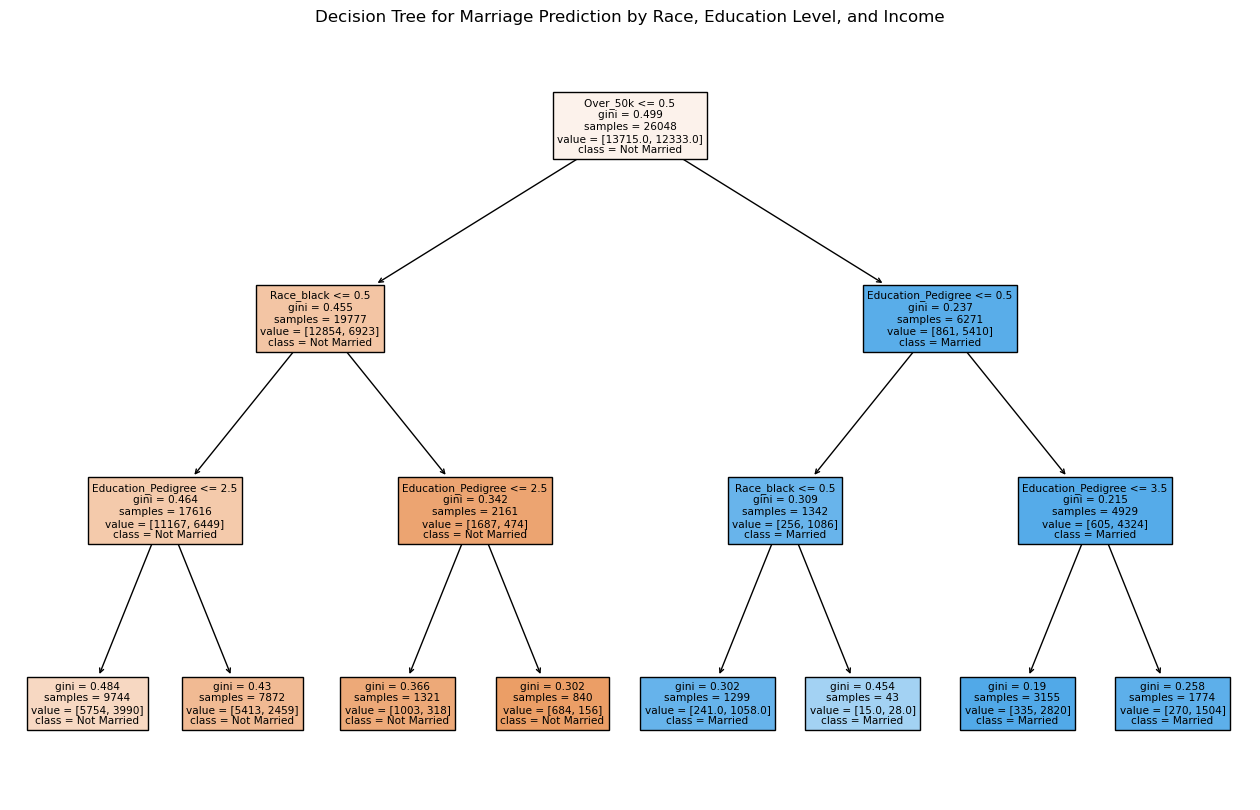

In [107]:
# Train a decision tree classifier
tree_model = DecisionTreeClassifier(max_depth = 3, random_state=42, )  # Limiting depth for interpretability
tree_model.fit(X_train, y_train)


# Plot the decision tree
plt.figure(figsize=(16, 10))
plot_tree(
    tree_model,
    feature_names= X.columns.tolist(),
    class_names=["Not Married", "Married"],
    filled=True
)
plt.title("Decision Tree for Marriage Prediction by Race, Education Level, and Income")
plt.show()

In [109]:

# Get feature importance
feature_importances = tree_model.feature_importances_

# Create a DataFrame to display feature importance
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Display feature importance
feature_importance_df
df

dr = df[['Married', 'Education_Pedigree', 'Over_50k']]
dr

,Married,Education_Pedigree,Over_50k
0,0,4,0
1,1,4,0
2,0,2,0
3,1,2,0
4,1,4,0
...,...,...,...
32556,1,3,0
32557,1,2,1
32558,0,2,0
32559,0,2,0


In [113]:
print("Mapping of Simplified_Education_level to numeric labels:")
print(dict(enumerate(le_education.classes_)))


Mapping of Simplified_Education_level to numeric labels:
{0: 'postgraduate degree', 1: 'primary education', 2: 'secondary education', 3: 'some college', 4: 'undergraduate degree'}
